In [1]:
%matplotlib inline
import torch
from torch import nn

import sys
sys.path.append("..")
import d2lzh_pytorch.torch_package as d2l

print(torch.__version__)

/home/mylady/anaconda3/envs/d2l_pytorch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.1.2+cu121


In [2]:
n_train = 20
n_test = 100
num_inputs = 200
batch_size = 5


true_w, true_b = d2l.ones((num_inputs, 1)) * 0.01, 0.05

train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)

test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
#@tab pytorch
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [4]:
# 定义L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [5]:
# 定义训练代码实现
def train(lambd):
    w, b = init_params()
    
    net = lambda X: d2l.linreg(X, w, b)
    loss = d2l.squared_loss

    num_epochs = 100
    lr = 0.003
    
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)

        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 14.23647689819336


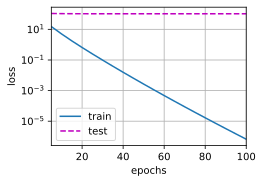

In [6]:
# 忽略正则化直接训练
train(lambd=0)

w的L2范数是： 0.34689441323280334


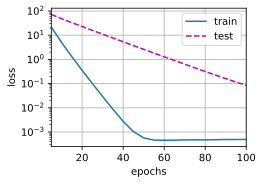

In [7]:
# 使用权重衰减
train(lambd=3)

w的L2范数是： 0.1119360625743866


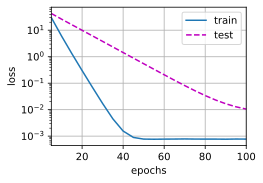

In [8]:
# 使用权重衰减
train(lambd=4)